# Do Not Delete!

In [1]:
# DO NOT REMOVE THESE
%load_ext autoreload
%autoreload 2

In [2]:
# DO NOT REMOVE This
%reload_ext autoreload

In [3]:
## DO NOT REMOVE
## import local src module -
## src in this project will contain all your local code
## clean_data.py, model.py, visualize.py, custom.py

#import src.base with alias to avoid namespace clashes

from src import base as fis

ModuleNotFoundError: No module named 'src'

In [4]:
fis.test_base()

NameError: name 'fis' is not defined

# Import Libraries

In [5]:
# !pip install imblearn

# Dataframes
import pandas as pd
import numpy as np

# Graphing
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Data Profiling
import pandas_profiling

# Data Preparation
    # Train:Test
from sklearn.model_selection import train_test_split
    # Normalize
from sklearn.preprocessing import normalize
    # Scaling
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
    # GridSearch
from sklearn.model_selection import GridSearchCV
    # PCA
from sklearn.decomposition import PCA

from sklearn.naive_bayes import GaussianNB
    
# KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from scipy.spatial import distance

# Random Forest
from sklearn.tree import DecisionTreeClassifier  # Decision Tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier  #Bagging & Random Forest
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
    # Visuals for Random Forest
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

# Logistic Regression
    # SK-learn
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
    # Statsmodel
import statsmodels.api as sm
from patsy import dmatrices

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

from imblearn.pipeline import make_pipeline
from sklearn.metrics import precision_recall_curve


from sklearn.model_selection import train_test_split, GridSearchCV

/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


# Functions

In [6]:
def make_model(X_train, y_train, X_test, y_test, classifier):

# make pipeline 
    model = classifier.fit(X_train, y_train)

# make predictions   
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

# print scores  
    print('Train Precision: ' + str(metrics.precision_score(y_train, train_predictions)))
    print('Train Recall: ' + str(metrics.recall_score(y_train, train_predictions)))
    print('Train F1: ' + str(metrics.f1_score(y_train, train_predictions)))
    print('\n')
    print('Test Precision: ' + str(metrics.precision_score(y_test, test_predictions)))
    print('Test Recall: ' + str(metrics.recall_score(y_test, test_predictions)))
    print('Test F1: ' + str(metrics.f1_score(y_test, test_predictions)))
    print('\n')
    
# print confusion matrix    
    cm = confusion_matrix(y_test, test_predictions)
    sns.heatmap(cm.T, square=True, annot=True, cmap='RdBu', cbar=False,
            xticklabels=['legitimate', 'fraud'], yticklabels=['legitimate', 'fraud'])
    plt.xlabel('true label')
    plt.ylabel('predicted label')

    tn, fp, fn, tp = confusion_matrix(y_test, test_predictions).ravel()
    print("Confusion Matrix:",'\nTN:', tn, 'FP:', fp, 'FN:', fn, 'TP:', tp)


    return model


# Start with clean data

In [7]:
df_cleaned = pd.read_csv('../data/processed/cleaned_dataframe.csv.gz', compression='gzip')
df_cleaned_scaled = pd.read_csv('../data/processed/cleaned_dataframe_scaled.csv.gz', compression='gzip')
df_cleaned.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V24,V25,V26,V27,V28,Amount,Class,time_of_day_1.0,time_of_day_2.0,time_of_day_3.0
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.774718,0,0,0,1
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.268530,0,0,0,1
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.959811,0,0,0,1
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.411487,0,0,0,1
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.141267,-0.206010,0.502292,0.219422,0.215153,0.667362,0,0,0,1


## Train-Test Split

In [30]:
X = df_cleaned.drop(['Class'], axis=1)
y = df_cleaned['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)
print("No. of samples in each training set:", X_train.shape[0])
print("No. of samples in each test set:", X_test.shape[0])

X_scaled = df_cleaned_scaled.drop(['Class'], axis=1)
y_scaled = df_cleaned_scaled['Class']

X_train_sc, X_test_sc, y_train_sc, y_test_sc = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)
print("No. of samples in each training set:", X_train.shape[0])
print("No. of samples in each test set:", X_test.shape[0])

No. of samples in each training set: 198608
No. of samples in each test set: 85118
No. of samples in each training set: 198608
No. of samples in each test set: 85118


In [31]:
under = RandomUnderSampler(0.25, random_state=10)
X_under, y_under = under.fit_resample(X_train, y_train) 

over_under = SMOTE(random_state=20)
X_mix, y_mix = over_under.fit_resample(X_under, y_under) 

under_sc = RandomUnderSampler(0.25, random_state=10)
X_under_sc, y_under_sc = under_sc.fit_resample(X_train_sc, y_train_sc) 

over_under_sc = SMOTE(random_state=20)
X_mix_sc, y_mix_sc = over_under.fit_resample(X_under_sc, y_under_sc)

In [32]:
sum(y_under)/len(y_under)

0.2

In [33]:
sum(y_mix)/len(y_mix)

0.5

In [34]:
len(y_mix)

2648

## Gaussian Bayes

Train Precision: 0.96845694799659
Train Recall: 0.8580060422960725
Train F1: 0.9098918702442932


Test Precision: 0.04439511653718091
Test Recall: 0.8450704225352113
Test F1: 0.0843585237258348


Confusion Matrix: 
TN: 82393 FP: 2583 FN: 22 TP: 120


GaussianNB(priors=None, var_smoothing=1e-09)

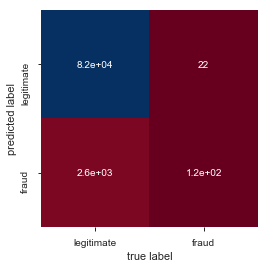

In [36]:
make_model(X_mix, y_mix, X_test, y_test, GaussianNB())

## KNN

Train Precision: 0.9783333333333334
Train Recall: 0.8867069486404834
Train F1: 0.93026941362916


Test Precision: 0.08362128541810643
Test Recall: 0.852112676056338
Test F1: 0.15229704216488357


Confusion Matrix: 
TN: 83650 FP: 1326 FN: 21 TP: 121


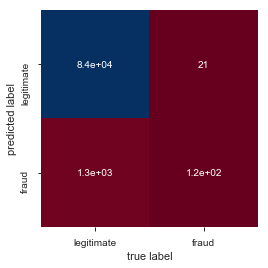

In [39]:
knn_smote_model = make_model(X_mix_sc, y_mix_sc, X_test_sc, y_test_sc, KNeighborsClassifier(n_neighbors=100, n_jobs=3))

# Logistic Regression

Train Precision: 0.9548816568047337
Train Recall: 0.9750755287009063
Train F1: 0.9648729446935723


Test Precision: 0.028929384965831435
Test Recall: 0.8943661971830986
Test F1: 0.056045895851721095


Confusion Matrix: 
TN: 80713 FP: 4263 FN: 15 TP: 127


LogisticRegression(C=1000000000000.0, class_weight={0: 1, 1: 3}, dual=False,
                   fit_intercept=False, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

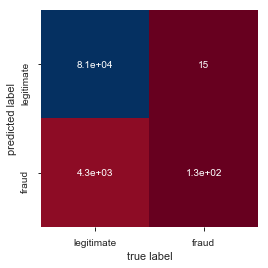

In [36]:
make_model(X_mix, y_mix, X_test, y_test, LogisticRegression(fit_intercept = False, C = 1e12, class_weight={0: 1, 1: 3}))

# Random Forest

Train Precision: 1.0
Train Recall: 0.9947129909365559
Train F1: 0.9973494888299886


Test Precision: 0.16323731138545952
Test Recall: 0.8380281690140845
Test F1: 0.2732491389207807


Confusion Matrix: 
TN: 84366 FP: 610 FN: 23 TP: 119


RandomForestClassifier(bootstrap=True, class_weight={0: 1, 1: 3},
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=10, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

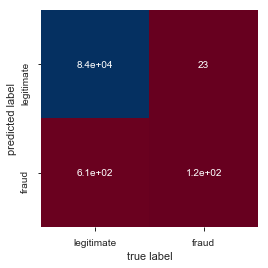

In [37]:
make_model(X_mix, y_mix, X_test, y_test, RandomForestClassifier(max_depth=10, class_weight={0: 1, 1: 3}))



## LinearSVC

Train Precision: 0.9727626459143969
Train Recall: 0.9441087613293051
Train F1: 0.9582215408202377


Test Precision: 0.04899249308573686
Test Recall: 0.8732394366197183
Test F1: 0.09277964833520388


Confusion Matrix: 
TN: 82569 FP: 2407 FN: 18 TP: 124


LinearSVC(C=1.0, class_weight={0: 1, 1: 2}, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

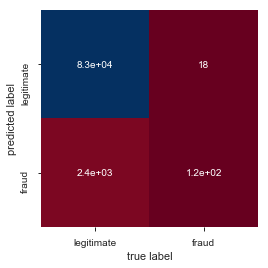

In [38]:
make_model(X_mix, y_mix, X_test, y_test, LinearSVC(class_weight={0: 1, 1: 2}))


## AdaBoost

Train Precision: 0.9931662870159453
Train Recall: 0.9879154078549849
Train F1: 0.9905338886785309


Test Precision: 0.05870236869207003
Test Recall: 0.8028169014084507
Test F1: 0.10940499040307103


Confusion Matrix: 
TN: 83148 FP: 1828 FN: 28 TP: 114


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

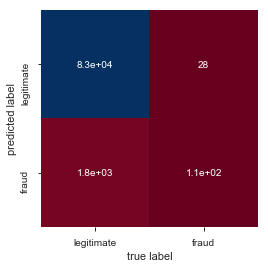

In [41]:
make_model(X_mix, y_mix, X_test, y_test, AdaBoostClassifier())

## Gradient Boosting

Train Precision: 0.9992383853769993
Train Recall: 0.9909365558912386
Train F1: 0.9950701554797118


Test Precision: 0.07668329177057356
Test Recall: 0.8661971830985915
Test F1: 0.140893470790378


Confusion Matrix: 
TN: 83495 FP: 1481 FN: 19 TP: 123


GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

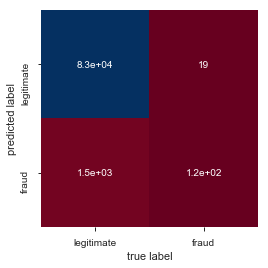

In [42]:
make_model(X_mix, y_mix, X_test, y_test, GradientBoostingClassifier())